In [9]:
import torch
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2, 4, 6, 8]], dtype=torch.float32)
Y = Y.view(Y.shape[0], -1)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    print("---")
    print(self.lin(x))
    return self.lin(x)
  
model = LinearRegression(input_size, output_size)

# print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(X)
  l = loss(Y, y_pred)
  
  optimizer.zero_grad()
  l.backward()
  optimizer.step()

  # if epoch % 10 == 0:
  #   [w, b] = model.parameters()
  #   print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l:.8f}')

# print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

---
tensor([[-0.2266],
        [ 0.4072],
        [ 1.0409],
        [ 1.6747]], grad_fn=<AddmmBackward0>)
---
tensor([[0.0569],
        [0.8886],
        [1.7203],
        [2.5520]], grad_fn=<AddmmBackward0>)
---
tensor([[0.2948],
        [1.2905],
        [2.2862],
        [3.2819]], grad_fn=<AddmmBackward0>)
---
tensor([[0.4947],
        [1.6261],
        [2.7575],
        [3.8889]], grad_fn=<AddmmBackward0>)
---
tensor([[0.6630],
        [1.9065],
        [3.1500],
        [4.3935]], grad_fn=<AddmmBackward0>)
---
tensor([[0.8049],
        [2.1409],
        [3.4770],
        [4.8130]], grad_fn=<AddmmBackward0>)
---
tensor([[0.9249],
        [2.3371],
        [3.7492],
        [5.1614]], grad_fn=<AddmmBackward0>)
---
tensor([[1.0266],
        [2.5013],
        [3.9760],
        [5.4507]], grad_fn=<AddmmBackward0>)
---
tensor([[1.1130],
        [2.6389],
        [4.1648],
        [5.6907]], grad_fn=<AddmmBackward0>)
---
tensor([[1.1867],
        [2.7544],
        [4.3221],
        [5.

d:\Belajar\AI Arifin\.venv\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 10, loss = 4421.4668
epoch: 20, loss = 3299.9500
epoch: 30, loss = 2487.8613
epoch: 40, loss = 1899.2325
epoch: 50, loss = 1472.1761
epoch: 60, loss = 1162.0745
epoch: 70, loss = 936.7188
epoch: 80, loss = 772.8289
epoch: 90, loss = 653.5595
epoch: 100, loss = 566.7089


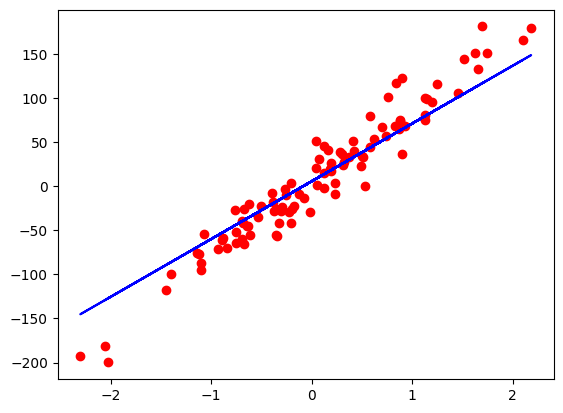

In [3]:

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

# 1. Design Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. Loss and Optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 3. Training Loop
num_epochs = 100
for epoch in range(num_epochs):
  # Forward pass
  y_predicted = model(X)
  # Compute loss
  loss = criterion(y_predicted, y)
  # Backward pass
  optimizer.zero_grad()
  loss.backward()
  # Update weights
  optimizer.step()
  
  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
